In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
df.shape 

(16598, 11)

In [6]:
df.size

182578

In [15]:
cols = list(df.columns)
cols

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [25]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'Rank': 0,
 'Name': 0,
 'Platform': 0,
 'Year': 271,
 'Genre': 0,
 'Publisher': 58,
 'NA_Sales': 0,
 'EU_Sales': 0,
 'JP_Sales': 0,
 'Other_Sales': 0,
 'Global_Sales': 0}

In [26]:
import matplotlib.pyplot as plt

In [19]:
platform_data = {name: df["Platform"].to_list().count(name) for name in df["Platform"].unique()}
platform_data

{'Wii': 1325,
 'NES': 98,
 'GB': 98,
 'DS': 2163,
 'X360': 1265,
 'PS3': 1329,
 'PS2': 2161,
 'SNES': 239,
 'GBA': 822,
 '3DS': 509,
 'PS4': 336,
 'N64': 319,
 'PS': 1196,
 'XB': 824,
 'PC': 960,
 '2600': 133,
 'PSP': 1213,
 'XOne': 213,
 'GC': 556,
 'WiiU': 143,
 'GEN': 27,
 'DC': 52,
 'PSV': 413,
 'SAT': 173,
 'SCD': 6,
 'WS': 6,
 'NG': 12,
 'TG16': 2,
 '3DO': 3,
 'GG': 1,
 'PCFX': 1}

Визуализируем 7 наиболее популярных игровых приставок и их частота появления в таблице

In [16]:
from operator import itemgetter

In [17]:
platf_data = [(name, df["Platform"].to_list().count(name)) 
                  for name in df["Platform"].unique() ]
platf_data = sorted(platf_data, key=itemgetter(1))
pl_data = platf_data[:-8:-1]
pl_data

[('DS', 2163),
 ('PS2', 2161),
 ('PS3', 1329),
 ('Wii', 1325),
 ('X360', 1265),
 ('PSP', 1213),
 ('PS', 1196)]

In [55]:
cases = []
platforms = []
for i in range(len(pl_data)):
    platforms.append(pl_data[i][0])
    cases.append(pl_data[i][1])

platform_info = pd.DataFrame({"platforms": platforms, "number of games": cases})

<AxesSubplot:xlabel='platforms'>

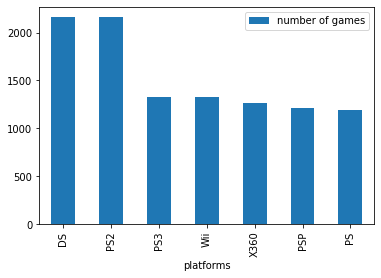

In [56]:
platform_info.plot.bar(x="platforms",
                 y="number of games")

Визуализируем общее кол-во продаж игр, на конкретных приставках (из предыдущего топа)

Text(0, 0.5, 'Sales')

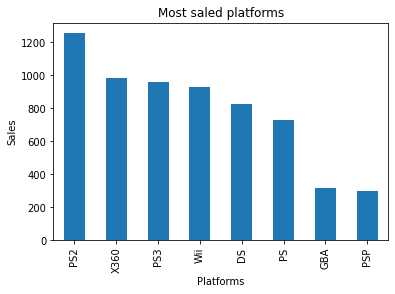

In [12]:
import numpy as np

pl_sales = df.groupby(["Platform"])["Global_Sales"].agg(np.sum)

fig = pl_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled platforms")
fig.set_xlabel("Platforms")
fig.set_ylabel("Sales")

Визуализируем продажи для самых популярных платформ в разных территориях

<ipython-input-46-f7c888e1cf58>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  platform_sales_all = df.groupby(["Platform"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)


Text(0, 0.5, 'Sales')

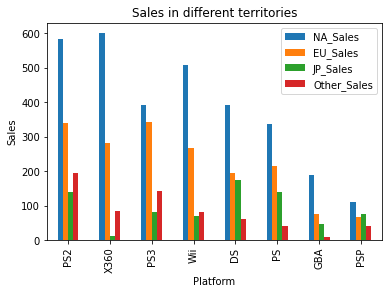

In [46]:
platform_sales_all = df.groupby(["Platform"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)
platform_sales_all = platform_sales_all.sort_values("Global_Sales", ascending=False)[:8]
del platform_sales_all["Global_Sales"]

fig = platform_sales_all.plot.bar()
fig.set_title("Sales in different territories")
fig.set_xlabel("Platform")
fig.set_ylabel("Sales")

Визулизируем, какие года выпуска игр наиболее часто встречаются в датасете. Это характеризует игры, которые вышли в этот год и имеют более 100 тыс. проданых копий

Text(0.5, 0, 'Year')

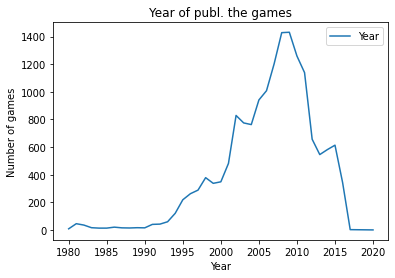

In [114]:
year_data = {year: df["Year"].to_list().count(year) for year in set(df["Year"])}
year_df = pd.DataFrame.from_dict(data=year_data, orient="index", columns=["Year"])

fig = year_df.plot()
fig.set_title("Year of publ. the games")
fig.set_ylabel("Number of games")
fig.set_xlabel("Year")

Визуализируем наиболее популярные игровые жанры

Text(0, 0.5, 'Sales')

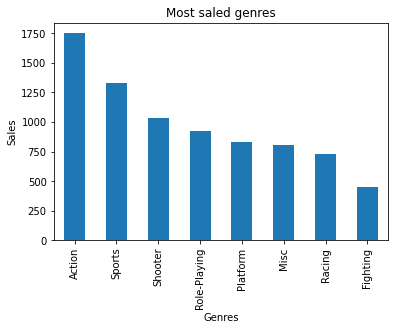

In [11]:
genre_sales = df.groupby(["Genre"])["Global_Sales"].agg(np.sum)

fig = genre_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled genres")
fig.set_xlabel("Genres")
fig.set_ylabel("Sales")

<ipython-input-48-1fc48d9113ef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_sales_all = df.groupby(["Genre"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)


Text(0, 0.5, 'Sales')

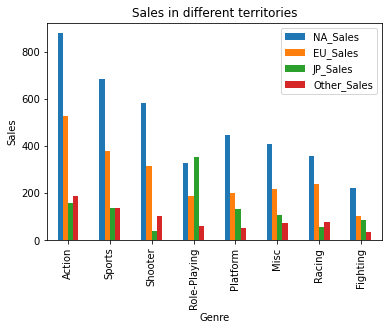

In [48]:
genre_sales_all = df.groupby(["Genre"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)
genre_sales_all = genre_sales_all.sort_values("Global_Sales", ascending=False)[:8]
del genre_sales_all["Global_Sales"]

fig = genre_sales_all.plot.bar()
fig.set_title("Sales in different territories")
fig.set_xlabel("Genre")
fig.set_ylabel("Sales")

Визуализируем наиболее популярных издателей

Text(0, 0.5, 'Sales')

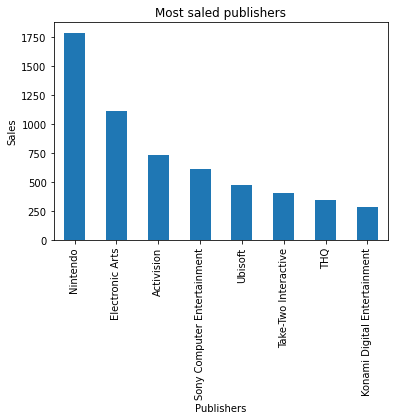

In [14]:
publisher_sales = df.groupby(["Publisher"])["Global_Sales"].agg(np.sum)

fig = publisher_sales.sort_values(ascending=False)[:8].plot.bar()
fig.set_title("Most saled publishers")
fig.set_xlabel("Publishers")
fig.set_ylabel("Sales")

<ipython-input-49-b9db0339b970>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  publisher_sales_all = df.groupby(["Publisher"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)


Text(0, 0.5, 'Sales')

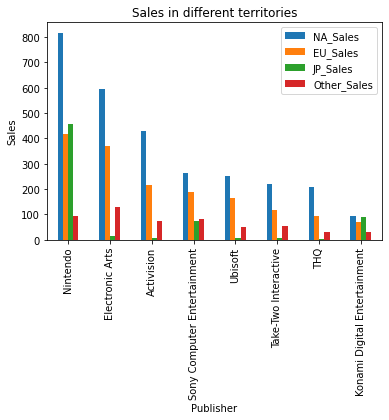

In [49]:
publisher_sales_all = df.groupby(["Publisher"])["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"].agg(np.sum)
publisher_sales_all = publisher_sales_all.sort_values("Global_Sales", ascending=False)[:8]
del publisher_sales_all["Global_Sales"]

fig = publisher_sales_all.plot.bar()
fig.set_title("Sales in different territories")
fig.set_xlabel("Publisher")
fig.set_ylabel("Sales")